## Summarize the problem + explain the steps you plan to take to address the problem
1. How to do the EDA,how to choose the suitable plots to show the relationship between the explanatory variables and the response varaiable
   
   To address the problem, I googled boxplots, barplots to see their definition and see how people use them to explain the data.Finally, I can be more familar to these plots and decide to use them for my data.
2. How to Plot histogram with multiple sample sets together?
   
   To address the problem, I googled how to plot the histogram and read 3 articles to find out the method to plot the multiple data at the same time.
    
3. In the EDA part, when I tried to use the Statistics model to predict which variable is better for the response variable, I get some bugs to run the code because I for get the consequence of the medol.
   
   To address the problem, I reviewed all the lecture notes that we had learnt in our statistics class, finally I can get it.
   
   
  
## References:
1. Plot histogram with multiple sample sets and demonstrate:
    
    https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html
    
    https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html
    
2. How to Identify Skew and Symmetry in a Statistical Histogram: 

   https://www.dummies.com/education/math/statistics/how-to-identify-skew-and-symmetry-in-a-statistical-histogram/
   

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [183]:
# read data from github

df = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/DAV-6150/master/M2_Data.csv")
df


,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## Part2: Perform some basic exploratory data analysis (EDA) 

In [184]:
# At first, print a summary of the data to better understand the details, 
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### From the chart above, we can clearly see the mean, standerd diviation, first quartile (Q1), median, third quartile (Q3),minmum and maxmum for each attribute.

Text(0.5, 0, 'energy output')

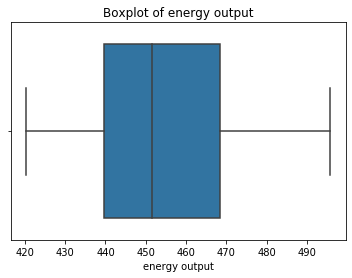

In [185]:
# use box plot to show the details of energy output
sns.boxplot(x='EP', data=df)

# give the plot a title
plt.title('Boxplot of energy output')
 
# x-axis label for a box plotdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWAAAAEWCAYAAABYGk2QAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAT40lEQVR4nO3de5CldX3n8fdnZgiC3MJFlMEwkdEFdhNZAyTeEldNqlaNmAoRFFxRNBs3jIRETbRihSSSgvIC7lRi1jUotyiuEK9kSwujBIzcFAwRJK2BwOAFZOQ2gA5894/n1ztnDt1z6enu3xl4v6pO9TnP7fft5zn9Oc/zO31+J1WFJGnxLeldgCQ9XhnAktSJASxJnRjAktSJASxJnRjAktSJAawZJflIknctUlu/keTWJPcl+c+L0aY0CQzgCZfk5iQPtHBam+RzSZ7au65RSSrJym3YxHuAE6tql6r6+nzVtb1KsqLt02WTuD3NHwN4+/DrVbUL8BTg+8DqzvXMtwOAf+ldRJKlvWvQ44sBvB2pqgeBTwCHTE9LsnuSc5LckeSWJH+cZEmb94EknxhZ9vQkl2TwgiS3JXlHkjvbmfaxs7Wd5I1JppLcleTTSfZr0y9ti1zXztKPnmHdJa2uW5L8oNW7e5Idk9wHLG3rf3uWtg9K8oXW9reSvHJk3keS/GW7Mrg3yRVJDtyKdT+Q5OIk9wP/JcleST6T5J4kVyV5V5LL2vJ/meS9Y7V9JsnvzVL3c9o27m4/nzMy7+YkLx55fEqS89rD6X36o7ZPn53k+CSXJ1ndtndjkhfNdXsz1asOqsrbBN+Am4EXt/s7A2cD54zMPwf4FLArsAK4CThhZPmbgOOB5wN3Avu3eS8A1gPvA3YEfgW4H/gPbf5HgHe1+y9s6z6rLbsauHSkhgJWbuJ3eD0wBTwN2AW4CDh3S9YHngjcCrwOWNZquBP4jyN13gUc0eafD3xsK9a9G3guw8nIE4CPtdvODC90twKXteWPAG4HlrTHewPrgH1nqHtPYC3wmtb2q9rjvcaPa3t8CnBeu7+i7ZNlI/OPb8frZGAH4OhW+55z2Z63ybh5Brx9+GSSHwH3AL8KvBv+/yXz0cDbq+reqroZeC/DHz1VtQ44jiFkzwNWVdVtY9t+Z1U9VFVfBj4HvJJHOxY4q6q+VlUPAW8Hnp1kxRbWfyzwvqr6TlXd19Y/Zgv7JF8G3FxVH66q9VX1NeBC4KiRZS6qqiuraj1DAB+6Fet+qqour6pHgJ8Avwn8SVWtq6pvMrzgAVBVVzKE3vSZ5zHAl6rq+zPU/VLgX6vq3Nb2R4EbgV/fgt95Nj8Azqyqn1TVBcC3WjvaThnA24dXVNUeDGefJwJfTvJkhjOwnwJuGVn2FmD59IMWGt8BAnx8bLtrq+r+sXX3m6H9/UbbaCH6w9F2NmOj9dv9ZcC+W7DuAcAvJvnR9I0h0J88ssz3Ru6vYzjL3tJ1bx25v0+r69ZZ5sMQyMe1+8cB585S9/jvDGPHZg7WVNXo6FmzHS9tJwzg7UhVPVxVFwEPA89juJz+CUPQTPsZYM30gyS/yxDctwNvG9vkTyd54ti6t8/Q9O2jbbR19hptZzM2Wr+1s57hDcXNuRX4clXtMXLbpareNE/rjgbaHa2u/Uemjf/HyXnAkUmeCRwMfHKWtsd/Z9j42NzP0M0xbfRFYbYhCpcnydj2po/XXLanzgzg7Uh78+xI4KeBG6rqYYaz2lOT7JrkAOD3GUKCJM8A3sVwpvYa4G1JDh3b7J8m+akkz2e4ZP8/MzT9t8DrkhyaZEfgL4ArWpcHDEH6tE2U/lHg5CQ/m2SXtv4Frctgcz4LPCPJa5Ls0G6HJzl4vtdt+/Mi4JQkOyc5CPhvY8vcBlzFcOZ7YVU9MEvbF7e2X51kWXtz8pBWE8C1DN0wOyQ5jI27Re4AHuHR+/RJwJvbOr/F8AJw8TZsT50ZwNuHz7T/FrgHOBV4bVVN/9vWKoazn+8AlzGE5Vmtf/U84PSquq6q/hV4B3BuC1EYLt3XMpxFnQ/8TlXdON54VV0CvJOh//S7wIEM/Z/TTgHObpf5M/Uhn8UQWJcC/wY82OrerKq6F/i11t7trebTGc7qF2LdE4Hd27LnMrx4PDS2zNnAzzF79wNV9UOGF7Q/YOiueRvwsqq6sy3yTob9uBb4U4bjNr3uOobjfHnbp7/UZl0BPJ3hyudU4KjWzly3p86ycZeSHi+SvIDhXfL9N7fs41mS04EnV9VrR6b9MsOL24r25t1i1HE88Iaqet5itKfF4RmwNKL93/DPt+6eI4ATgL8bmb8DcBLwocUKXz12GcDSxnZl6Ae+n6F//b0M/2dN6zv+EcMnEs/sVaAeO+yCkKROPAOWpE62anSkvffeu1asWLFApUjSY9M111xzZ1XtMz59qwJ4xYoVXH311fNXlSQ9DiQZ/1QkYBeEJHVjAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHWyVd8Jp8W1evVqpqamepcxZ2vWrAFg+fLlnSuZHCtXrmTVqlW9y9CEMIAn2NTUFNdefwMP77xn71LmZOm6uwH43kM+zQCWrrurdwmaMP5lTLiHd96TBw56Se8y5mSnGy8G2G7rn2/T+0OaZh+wJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHViAEtSJwawJHWyKAG8evVqVq9evRhNSdK8Wsj8WrYgWx0zNTW1GM1I0rxbyPyyC0KSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOjGAJakTA1iSOlm2GI2sWbOGBx54gJNOOmkxmnvMmJqaYsmPq3cZmidLHryHqal7/TvYzkxNTbHTTjstyLY3ewac5LeTXJ3k6jvuuGNBipCkx6PNngFX1QeBDwIcdthhczodW758OQDvf//757L649ZJJ53ENd/5fu8yNE8eecJurHzavv4dbGcW8orFPmBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqRODGBJ6sQAlqROli1GIytXrlyMZiRp3i1kfi1KAK9atWoxmpGkebeQ+WUXhCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUicGsCR1YgBLUifLehegTVu67i52uvHi3mXMydJ1PwTYbuufb0vX3QXs27sMTRADeIKtXLmydwnbZM2a9QAsX27oDPbd7o+p5pcBPMFWrVrVuwRJC8g+YEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE4MYEnqxACWpE5SVVu+cHIHcMsc2tkbuHMO6y0W69t2k16j9W27Sa9xkus7oKr2GZ+4VQE8V0murqrDFryhObK+bTfpNVrftpv0Gie9vpnYBSFJnRjAktTJYgXwBxepnbmyvm036TVa37ab9Bonvb5HWZQ+YEnSo9kFIUmdGMCS1Mm8BXCSpUm+nuSz7fH5Sb6V5PokZyXZoU1Pkv+ZZCrJN5I8a75q2Mr6/ibJda2GTyTZpU3fMckFrb4rkqxYjPpmqnFk+uok94087lLjDPvwI0n+Lcm17XZomz4pxzhJTk1yU5Ibkrx5wur7x5F9d3uST/asb5YaX5Tka63Gy5KsbNMn5Tn4wlbf9UnOTrKsTe+2D7fGfJ4BnwTcMPL4fOAg4OeAnYA3tOn/FXh6u/028IF5rGFr6ju5qp5ZVT8P/DtwYpt+ArC2qlYCZwCnL1J9M9VIksOAPcaW61Xjo+oD3lpVh7bbtW3apBzj44GnAgdV1cHAxyapvqp6/vS+A/4JuKhzfY+qsbV9bKvxb4E/btO7PweTLAHOBo6pqv/E8CGx17bleu7DLTYvAZxkf+ClwIemp1XVxdUAVwL7t1lHAue0WV8F9kjylPmoYyvru6fNC8MLxPS7kUcyHFSATwAvasssqJlqTLIUeDfwtrHFF73GmerbhIk4xsCbgD+rqkcAquoHE1bf9LxdgRcCn+xV3yZqLGC3dn934PaRGns/B/cCHqqqm9rjLwC/OVLfou/DrTVfZ8BnMoTEI+MzMnQ9vAb4v23ScuDWkUVua9MW0oz1Jfkw8D2GM/XV4/VV1XrgboYDvdBmqvFE4NNV9d2xZXvUONsxPrVd4p2RZMfx+ppex/hA4OgkVyf5+yRPn7D6pv0GcMn0SQF96oOZa3wDcHGS2xj+jk8br7Hjc/BOYId2lQhwFMMVz0b1NYu1D7fKNgdwkpcBP6iqa2ZZ5K+AS6vqH6dXmWGZBftfuE3VV1WvA/ZjuKQ5ukd9MHONSfYDfosNLwwbrTLDtB778O0ML16HA3sCfzhh9e0IPNg+nvq/gbMmrL5prwI+OrrKDMss+nOwORl4SVXtD3wYeN/0KjNsZlH3Ybu6PgY4I8mVwL3A+h71zdWyedjGc4GXJ3kJ8ARgtyTnVdVxSf4E2Af47yPL38aGVykYuiZuZ+HMWh9AVT2c5ALgrQxPsOn6bmsd+rsDdy1gfTPWCPwL8BAw1a7sdk4y1frcFrvGTe5D4KF2NfGW9ngijnGr48K2zN8xHN+Jqa/9jewFHMFwFjxtseubrcbPMfSfX9GWuYANV7KT9Bx8PkCSXwOeMVbftMXYh1uvqubtBrwA+Gy7/wbgK8BOY8u8FPh7hleoXwKunM8atqS+1vbKNi3Ae4D3tMe/C/x1u38M8PHFqm98H45Nv2/kfrcax47xU0b24ZnAaZNyjNv904DXj0y/apLqa49/Bzh7bJlu9Y3WyHCCdifwjDb9BODCCXsOPqn93BG4BHjhJOzDLb3NxxnwbP6a4V3Jf2pncBdV1Z8BFwMvAaaAdcDrFrCG2QQ4O8lu7f51DG/YAPwNcG6SKYZX9GM61Lc5k1Lj+Un2YdiH1zKECUzGMYYhgM9PcjJwHxv+E2dS6oPh2J02Nm0i6quq9UneCFyY5BFgLfD6NntSnoNvbd0TS4APVNUX2/SJ2Ieb40eRJakTPwknSZ0YwJLUiQEsSZ0YwJLUiQEsSZ0YwBKQ5BVJDtmG9fdI8j/msyY99hnAmjjTQwouslcAcw5ghhHrDGBtFQNY2yTJcUmubOPF/q82ghtJ7sswFu91Sb6aZN82fZ8kFya5qt2e26afkuSDST4PnJNk5yQfbwP9XNDGnD0syQlJzhhp/41J3jdDXa9K8s9tnNjTR6aPjqt8VIYxjZ8DvBx4d/s9DkzypSRnJvlK28YRI3W+ZWQb12cYC/c04MC2/rvndSfrMcsA1pwlOZhhEKPn1jBe7MPAsW32E4GvVtUzgUuBN7bp7wfOqKrDGYYOHB368BeAI6vq1Qxnk2trGK/5z9s8GMb0fXkbZQ+GTzh9eGQb0wMZnc4wxOOhwOFJXjHb71FVXwE+zYaxjb89/TtU1XNaLWfNtn7zR8C32/pv3cyyEjA/g/Ho8etFDMF4Vfu4+U7A9Ji7P2YYTwDgGuBX2/0XA4eMDB27WxsPF4ahNx9o95/HENZU1fVJvtHu35/ki8DLktwA7FBV/zxW1+HAl6rqDhi+nQX4ZTaMt7ulPtravDTJbknGB8aXtokBrG0RhoFk3j7DvJ/Uhs+5P8yG59oS4NkjQTtsaAjk+8e2PZsPAe8AbmTs7HcL1h397P0TNrHc+LLTj9ez8ZXj5rYhzcouCG2LS4CjkjwJIMmeSQ7YzDqfZ8PXP5H2PXIzuAx4ZVvmEIavtgKghuERnwq8mo3H0Z12BfArSfZufdKvAr7c5n0/ycEZvs5mdAjIe4Fdx7ZzdGv/ecDdVXU3cDPwrDb9WcDPbmJ9aZMMYM1ZVX2T4TvCPt+6CL4AbO5rX94MHNbeXPsmG0ZQG/dXwD5tu38IfIPhWxemfRy4vKrWzlDXdxkGi/8HhpHuvlZVn2qz/4iha+SLwOg3jXyMYWStryc5sE1bm+QrDCP7ndCmXQjsmeRahhH0bmpt/hC4vL0p55tw2iKOhqaJ1M5cd6iqB1sgXsIwLu2P2/zPMryZd8kCtf8l4C1VdfVCbF8C+4A1uXYG/qH9t0OAN1XVj9sbYVcC1y1U+EqLxTNgSerEPmBJ6sQAlqRODGBJ6sQAlqRODGBJ6uT/AfI5B2lP8HOBAAAAAElFTkSuQmCC
plt.xlabel('energy output')

#### From the boxplot above, we can see that the minmum energy output is about 420, the maxmum is 495, and the median is about 452. Most of the energy output is in 440-470.

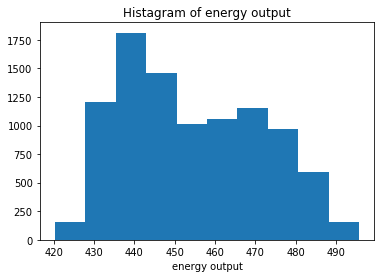

In [186]:
# use the histagram plot to show the frequency of the energy output
plt.hist(df['EP'], bins = 10)
# give the plot a title
plt.title('Histagram of energy output')
# x-axis label for a box plot
plt.xlabel('energy output')
plt.show()


#### From the energy output histogram which is strong right skew distribution, we can see that the highest frequecy of energy output is about 440, which is 1750 times, and the most of energy output is in 430-480 which the frequency is more than 1000.

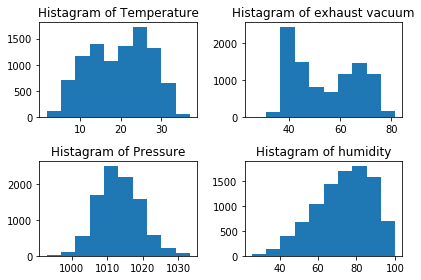

In [187]:
# use the histagram plot to show the frequency of the four explanatory variables:the temperature, ambient pressure, relative humidity,
# humidity and exhaust vacuum  


fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3= axes.flatten()

# use the histagram plot to show the frequency og the pressure
ax0.hist(df['T'], bins = 10, histtype='bar')
# give the plot a title
ax0.set_title('Histagram of Temperature')


ax1.hist(df['V'], bins = 10, histtype='bar')
ax1.set_title('Histagram of exhaust vacuum')

ax2.hist(df['AP'], bins = 10,  histtype='bar')
ax2.set_title('Histagram of Pressure')


ax3.hist(df['RH'], bins = 10,  histtype='bar')
ax3.set_title('Histagram of humidity')


fig.tight_layout()
plt.show()

#### From the temperature histagram above which  looks like a normal distribution. we can see that the highest frequency of temperature is in about 25 degree which has more 1500 times, and most of temperature is concentrated in 10-30 degree.

#### For the histagram of exhaust vacuum which is strong right skew. the highest frequency of vacuum is in about 40 which has more 2000 times, and most of temperature is concentrated in 38-50 and 60-75. 

#### For the histagram of pressure which looks like a nearly normal distribution. the highest frequency of Pressure is in about 1000 which has more 2300 times, and most of temperature is concentrated in 1005-1020. 

#### For the histagram of humidity which is strong left skew, the highest frequency of humidity is in about 80 which has more 1550 times, and most of temperature is concentrated in 70-90. 

#  Identify some preliminary predictive inferences

#### From the histigrams above, I pridict that the exhaust vacuum variable and humidity variable appear to be more relative to predicte the energy output variable, and they should be positively and negatively correlated separately. Since both of them are strong right skew and left skew respectively, and the energy output is also right skew. However, for the temperature and pressure , I guess them should be the least predictive, because they look like normal distributions which means that they do not have too much influence on the energy output. 

#### To verify my prediction, I choose to use the statsmodels to predict if there is a liner regression relationship between these explanatory variables and the response variable


# For the first temperature variable, use the statsmodels to find the relationship with the energy output response variable.


In [188]:
# For the first Temperature variable, we try to generate the regression model for the energy output response variable

import the statsmodelsimport statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

formula_string1 = "EP ~ T"

model1 = sm.formula.ols(formula = formula_string1, data = df)
model_fitted1 = model1.fit()

# print the medol summary
print(model_fitted1.summary())


SyntaxError: invalid syntax (<ipython-input-188-1eca4adbb11e>, line 3)

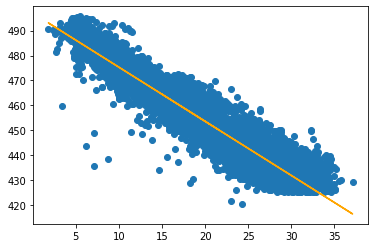

In [189]:
# Produce a scatterplot of the two variables and fit a linear model to summarize the relationship between these two 
#variables and finding the line that best follows their association.


import seaborn as sns
import matplotlib.pyplot as plt

x1 = df['T']
y1 = df['EP']

y_pred1 = model_fitted1.predict(x1)

plt.scatter(x1, y1)
plt.plot(x1, y_pred1, color = 'orange')
plt.show();

In [190]:
# print the R-square value for this model

print('R-squared1 =', model_fitted1.rsquared)

R-squared1 = 0.8989475964148236


### The R-square value represents the proportion of variability in the response variable that is explained by the explanatory variable. We try to use the rsquared function to estimate the strongth of this module, so for this model, it means there is about 90 percent of the temperature is fitted in this moedel.  and we can see that they are negatively relative.

# Similarly for Pressure variable, I use the same method to build the model


In [191]:

formula_string2 = "EP ~ AP"

model2 = sm.formula.ols(formula = formula_string2, data = df)
model_fitted2 = model2.fit()
#print(model_fitted2.summary())

# print the R-square value for this model
print('R-squared2 =', model_fitted2.rsquared)

R-squared2 = 0.2687686564110674


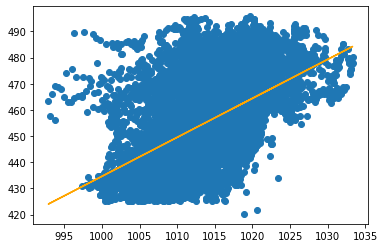

In [192]:
# Produce a scatterplot of the two variables and fit a linear model to summarize the relationship between these two 
#variables and finding the line that best follows their association.


import seaborn as sns
import matplotlib.pyplot as plt

x2 = df['AP']
y2 = df['EP']

y_pred2 = model_fitted2.predict(x2)

plt.scatter(x2, y2)
plt.plot(x2, y_pred2, color = 'orange')
plt.show();

### So for this model, it means there is only 27 percent of the pressure is fitted in this moedel.  

## For the relative humidity variable


In [193]:
# build the model 

formula_string3 = "EP ~ RH"

model3 = sm.formula.ols(formula = formula_string3, data = df)
model_fitted3 = model3.fit()
#print(model_fitted3.summary())


# print the R-square value for this model
print('R-squared3 =', model_fitted3.rsquared)

R-squared3 = 0.15193944023117578


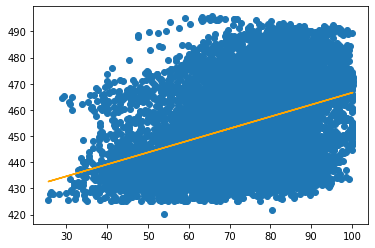

In [194]:
# Produce a scatterplot of the two variables and fit a linear model to summarize the relationship between these two 
#variables and finding the line that best follows their association.

x3 = df['RH']
y3 = df['EP']

y_pred3 = model_fitted3.predict(x3)

plt.scatter(x3, y3)
plt.plot(x3, y_pred3, color = 'orange')
plt.show();

### So for this model, it means there is only 15 percent of the relative humidity is fitted in this moedel.  

## For the exhaust vacuum variable

In [195]:
# similarly build the model 

formula_string4 = "EP ~ V"

model4 = sm.formula.ols(formula = formula_string4, data = df)
model_fitted4 = model4.fit()
#print(model_fitted4.summary())


# print the R-square value for this model
print('R-squared4 =', model_fitted4.rsquared)

R-squared4 = 0.7565177870683979


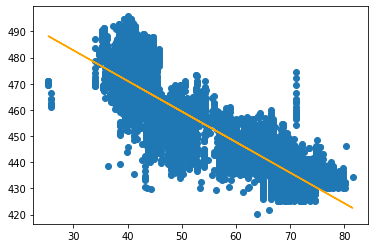

In [196]:
# Produce a scatterplot of the two variables and fit a linear model to summarize the relationship between these two 
#variables and finding the line that best follows their association.

x4 = df['V']
y4 = df['EP']

y_pred4 = model_fitted4.predict(x4)

plt.scatter(x4, y4)
plt.plot(x4, y_pred4, color = 'orange')
plt.show();

### So for this model, it means there is only 75 percent of the exhaust vacuum is fitted in this moedel. 

### Finally comparing these explanatory variables through their R_squares of the model, we can observe that the temperature has the higghtest R_square which means that it's the most predictive explanatory variavles for the energy output response variable. The second is exhaust vacuum. However the relative humidity is the least predictive to the response variable. 

# Part 4: Construct two different linear regression models that predict net hourly electrical energy output 

In [197]:
# check for missing energy output values
df['EP'].isnull().sum()

0

In [198]:
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# move the response variable (in this case "EP") to a separate variable
y = df.EP

# check results
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: EP, dtype: float64

In [199]:
# move only the explanatory variables to a separate variable 
# so that the original explanatory variables are preserved
X = df[['T','V','AP','RH']].copy()

# The ArrDelay column has been removed from the data set
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [200]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [201]:
# check the results
len(X_train)

6697

In [202]:
len(X_test)

2871

In [203]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

1371    446.36
4375    489.68
7994    426.48
5579    457.49
7297    450.97
Name: EP, dtype: float64

In [204]:
X_test.head()

,T,V,AP,RH
1371,25.13,68.63,1013.57,43.44
4375,3.96,35.47,1016.79,83.81
7994,28.55,74.33,1011.77,73.34
5579,15.60,41.04,1025.48,64.43
7297,20.77,51.30,1013.89,88.72


In [205]:
y_train.head()

1090    473.67
6137    436.33
4703    475.61
1901    473.56
3704    453.90
Name: EP, dtype: float64

## Using scikit-learn's Cross Validation Capabilities

#### To make use of cross validation capability via the __cross_val_score()__ function in the scikit-learn, we continue our example from above by constructing a small linear regression model for purposes of predicting energy output  using the providedexpanatory variables.

# First linear regression model:

### How to decided upon the explanatory variables:
#### According to my EDA above, I choose temperature and exhaust vaccum as my explanatory variables for my first linear model,because both of them have the higher R_squares that I got from my stasmodel.

In [206]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the T and V variables (our explanatory variables for the linear
# regression model)
newX_train1 = X_train[['T', 'V']].copy()

# sanity check
newX_train1.head()

,T,V
1090,12.57,39.30
6137,25.27,69.89
4703,12.57,41.66
1901,13.80,39.82
3704,18.80,47.83


### Fit the model using 5-fold cross validation; Also specify the number of folds to use during cross validation via the 'cv' parameter

In [207]:
# Assing the model function to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation and specify the number of folds to use during cross validation via the 'cv' parameter
scores1 = cross_val_score(model, newX_train1, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores1)

[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]


In [208]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores1)

0.9148303865957537

In [209]:
# fit the model using 10-fold cross validation and specify the number of folds to use during cross validation via the 'cv' parameter
scores10 = cross_val_score(model, newX_train1, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores10)

[0.90125496 0.9188024  0.91232847 0.91858987 0.92210885 0.90963351
 0.91711569 0.91853757 0.91312528 0.91637728]


In [210]:
# calculate the average accuracy across all 5 folds
np.mean(scores10)

0.9147873877833836

#### Both My 5-fold and 10-fold cross validation shows that our model has a cross validated accuracy of 91.5%

# Second linear regression model:

#### According to my EDA above, I choose pressure and humidity as my explanatory variables for my second linear model, because both of them have the lowest R_square value.

In [211]:
# create a new dataframe containing only the T and V variables (our explanatory variables for the linear
# regression model)
newX_train2 = X_train[['AP', 'RH']].copy()

# sanity check
newX_train2.head()

,AP,RH
1090,1019.57,72.44
6137,1015.21,79.33
4703,1009.11,70.74
1901,1012.37,83.69
3704,1005.86,76.77


In [212]:
# Assing the model function to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation and specify the number of folds to use during cross validation via the 'cv' parameter
scores2 = cross_val_score(model, newX_train2, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores2)

[0.41374371 0.38086896 0.3574     0.38344809 0.37106933]


In [213]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores2)

0.3813060168884857

#### My 10-fold cross validation shows that our model has a cross validated accuracy of 38.1%

### So comparing these two models, the first one have the higher cross validation scores 91.4%, which  means that the temperature and vaccum variables are the best choice to predite the energy output in my model. 

### Conclusion: 

### From the models I built above and the EDA explanation, we can observe that the first model is the best to predict the energy utoput. Among all the explanatory variables, temperature is the best one to predict and humidity is not efficient to predict the energy output. when we combine the temperatuer and vaccum variables together, this model is the best predictive. and also when we add the pressure and humidity together, their scross validation score ia also higher than their individual regression R_square. Additionally, I test the different K-fold cross validation, and found that the difference between their scores are very small, so we do not worry too much about the K-fold comparing to the explanatory variables which has most influence in our medol.